<a href="https://colab.research.google.com/github/AndreyKuratov/project_mldm_21/blob/main/MLDM_proj_2_overview_of_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as signal
import os
import tqdm

In [ ]:
PATH_TO_DIR = '/content/drive/MyDrive/mldm21_project/'

# 1. Функции загрузки данных

In [ ]:
data_pd = pd.read_csv('/content/drive/MyDrive/mldm21_project/train_tp.csv')
data_pd

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70
...,...,...,...,...,...,...,...
1211,fe8d9ac40,13,1,53.4720,93.750,54.0960,843.75
1212,fea6b438a,4,1,43.5787,2531.250,45.7653,4031.25
1213,ff2eb9ce5,0,1,15.2267,5906.250,16.0213,8250.00
1214,ffb8d8391,5,1,14.3467,4781.250,16.6987,10406.20


max:  23  min:  0


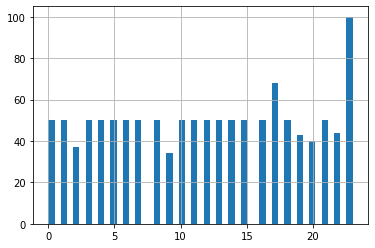

In [ ]:
a_loc = data_pd['species_id']
print('max: ',a_loc.max(), ' min: ', a_loc.min())
a_loc.hist(bins=49);

max:  4  min:  1


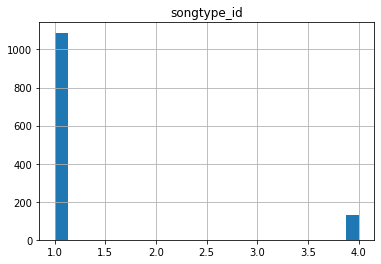

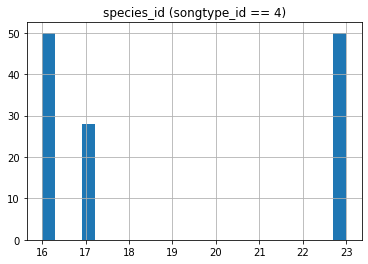

In [ ]:
a_loc = data_pd['songtype_id']
print('max: ',a_loc.max(), ' min: ', a_loc.min())
plt.title('songtype_id')
a_loc.hist(bins=23);

plt.figure()
plt.title('species_id (songtype_id == 4)')
data_pd[data_pd['songtype_id']==4]['species_id'].hist(bins=23);

In [ ]:
data_pd['dt'] = data_pd['t_max']	-	data_pd['t_min']
ab_loc = data_pd[data_pd['songtype_id']!=4]
ac_loc = data_pd[data_pd['songtype_id']==4]

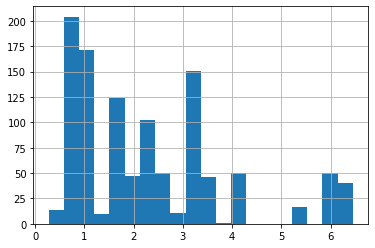

In [ ]:
ab_loc['dt'].hist(bins=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

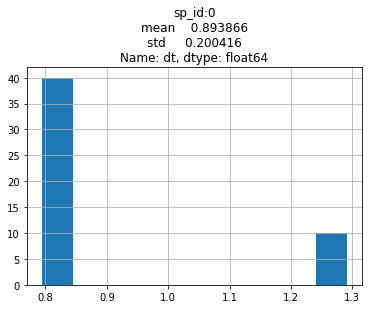

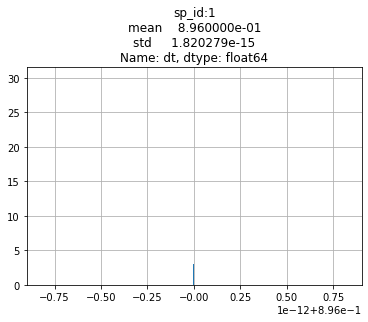

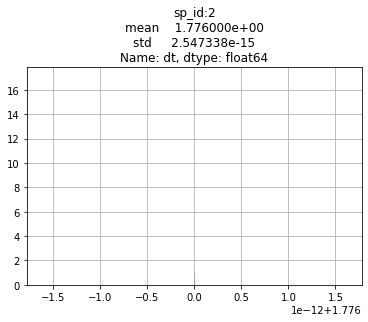

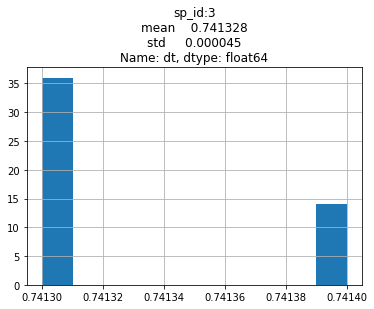

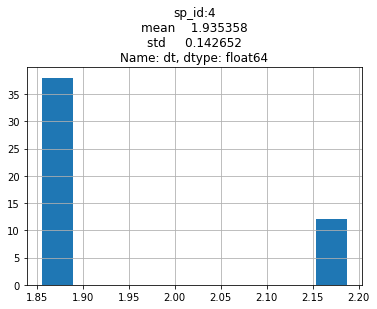

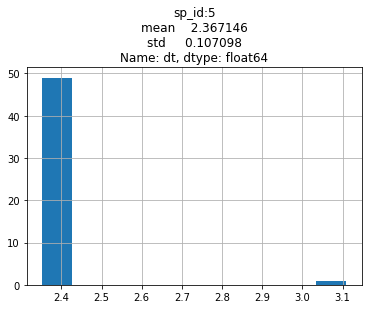

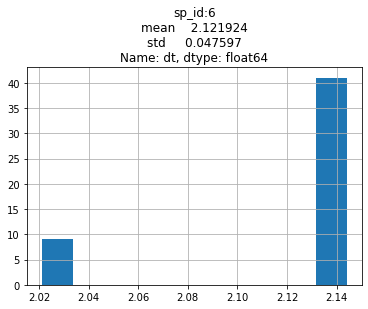

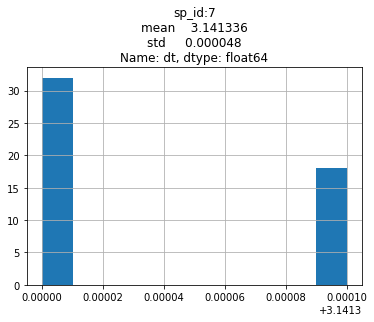

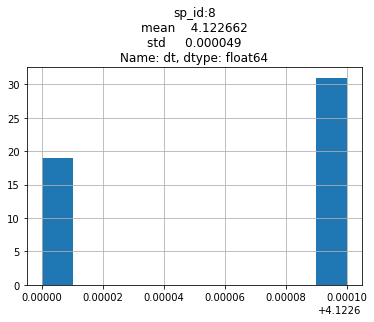

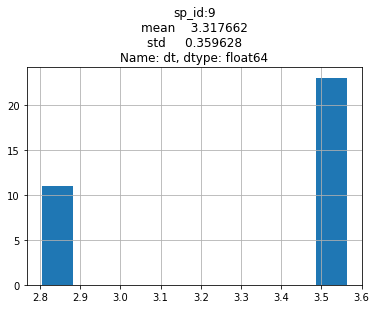

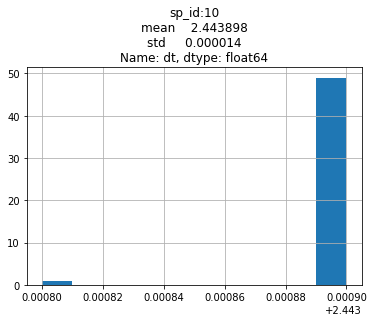

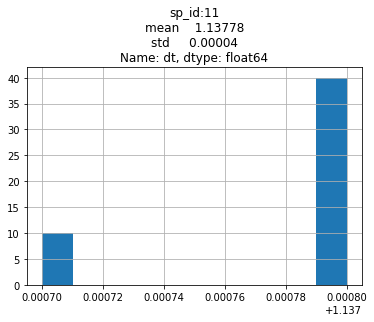

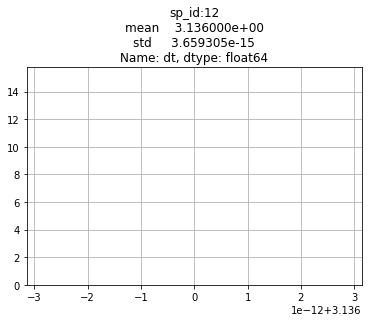

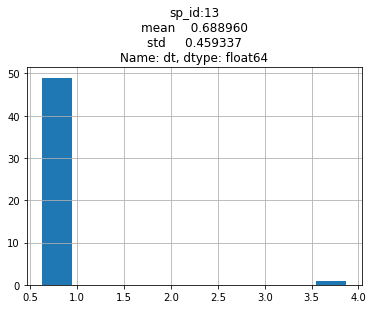

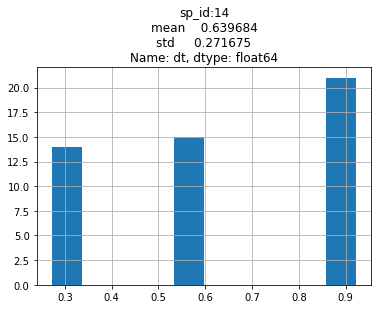

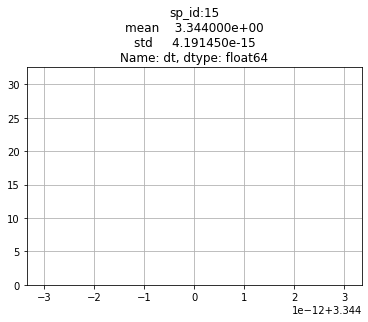

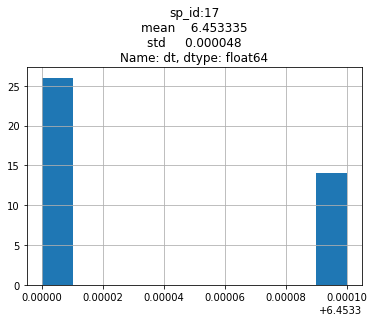

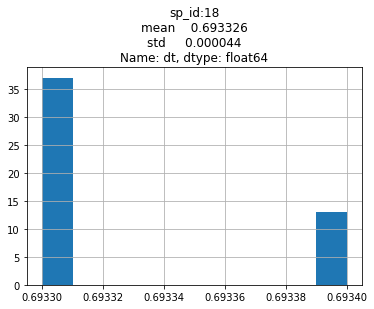

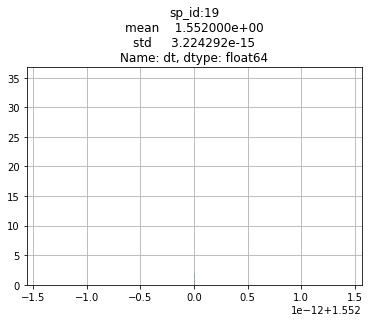

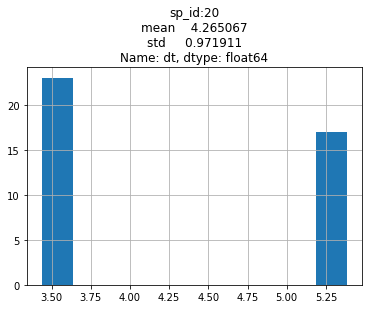

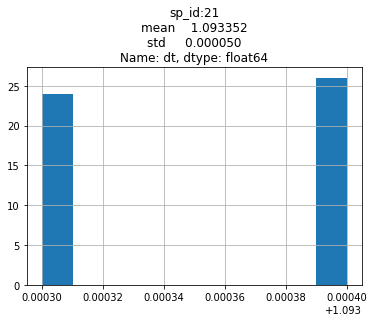

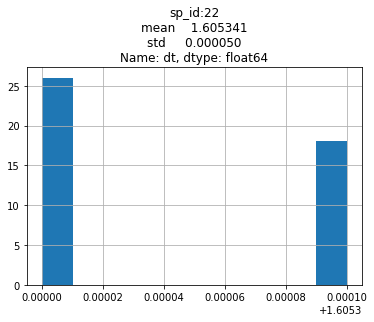

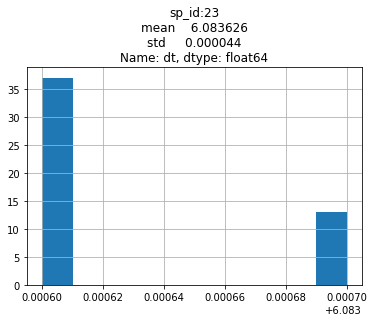

In [ ]:
for iSpec in np.unique(ab_loc['species_id'].values):
  TITLE =  'sp_id:'+str(iSpec)+'\n'+str(ab_loc[ab_loc['species_id']==iSpec]['dt'].describe()[['mean','std']])
  #print(TITLE,flush=True)
  plt.figure()
  plt.title(TITLE)
  ab_loc[ab_loc['species_id']==iSpec]['dt'].hist(bins=10)

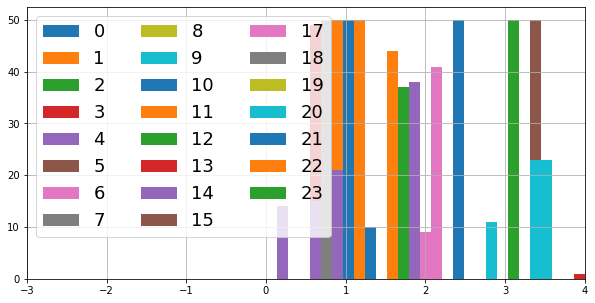

In [ ]:
plt.figure(figsize=(10,5))
plt.xlim([-3,4])
bins = np.linspace(0,4,30)
for iSpec in np.unique(ab_loc['species_id'].values):
  ab_loc[ab_loc['species_id']==iSpec]['dt'].hist(bins=bins,label=str(iSpec),linewidth=1)
plt.legend(fontsize = 18,ncol=3)


In [ ]:
data_pd[data_pd['species_id']==2]

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max,dt
33,05b9c974c,2,1,31.9840,468.75,33.7600,3000.0,1.776
60,0e034f968,2,1,1.8933,468.75,3.6693,3000.0,1.776
62,0e2e4ac19,2,1,44.5600,468.75,46.3360,3000.0,1.776
69,100e4ddc9,2,1,1.2853,468.75,3.0613,3000.0,1.776
104,160b70831,2,1,1.9413,468.75,3.7173,3000.0,1.776
151,1fb94ae60,2,1,48.2453,468.75,50.0213,3000.0,1.776
194,287bf77ec,2,1,12.1813,468.75,13.9573,3000.0,1.776
195,287bf77ec,2,1,8.8320,468.75,10.6080,3000.0,1.776
223,2dc763e67,2,1,15.7707,468.75,17.5467,3000.0,1.776
224,2dc763e67,2,1,26.1493,468.75,27.9253,3000.0,1.776


# TP and FP

In [5]:
data_tp = pd.read_csv('/content/drive/MyDrive/mldm21_project/train_tp.csv')
data_fp = pd.read_csv('/content/drive/MyDrive/mldm21_project/train_fp.csv')
data_tp.head()

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70


In [6]:
all_tp = data_tp['recording_id'].values
all_fp = data_fp['recording_id'].values
unique_tp,counts_tp = np.unique(all_tp,return_counts=True)
unique_fp,counts_fp = np.unique(all_fp,return_counts=True)

print('tp',len(unique_tp),len(all_tp))
print('fp',len(unique_fp),len(all_fp))

tp 1132 1216
fp 3958 7781


In [7]:
intersect_tpfp = np.intersect1d(unique_fp,unique_tp)
print('intersect:', len(intersect_tpfp))

intersect: 363


In [9]:
 data_fp[data_fp['recording_id'] == intersect_tpfp[10]]

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
204,068f1b8e2,21,1,26.0747,3281.25,27.168,4125.0


In [10]:
 data_tp[data_tp['recording_id'] == intersect_tpfp[10]]

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
36,068f1b8e2,12,1,22.864,562.5,26.0,3281.25


In [26]:
tp_multipl = unique_tp[counts_tp>=2]
len(tp_multipl)

67

In [27]:
  for ival in tp_multipl:
  data_temp = data_tp[data_tp['recording_id'] == ival]
  print(data_temp['recording_id'].values[0],len(data_temp['recording_id']),np.unique(data_temp['species_id'].values))

03b96f209 2 [16]
053aeb7bd 2 [23]
11c2c02e5 2 [15]
160add406 2 [23]
16553d5cd 2 [23]
178b835e3 3 [16 20]
1aa00dc63 2 [12 23]
21e2f2977 2 [15]
287bf77ec 2 [2]
2bcddf9a5 2 [3 5]
2d09eb065 2 [15 19]
2dc763e67 3 [2]
2eb098e76 3 [2 3]
33d0f2685 2 [16]
34340b225 2 [ 5 23]
349095631 2 [0 9]
3c621e663 3 [17]
400b7210c 4 [17 19]
41829d963 2 [2]
43d34d63c 2 [ 2 15]
48fb5143f 2 [20]
534db172e 2 [19]
551385b05 2 [11 23]
55b2b19d1 2 [23]
561ed4362 2 [ 7 14]
59a9eb657 2 [23]
5b1e3b55b 2 [17]
5bfe1dec6 3 [17]
5db2e86fe 2 [ 7 15]
5f8eecc9e 4 [ 9 23]
5f9b4785b 2 [ 1 15]
60b260508 2 [ 8 21]
69aacafc4 2 [20]
6bf2953a8 2 [20]
6d93f853d 2 [ 3 17]
71cf9646b 2 [15 19]
728459067 2 [10]
77299bde7 2 [ 8 21]
774912d66 2 [23]
7a9d46229 2 [ 5 22]
9251fdbdd 2 [16]
942ca05c0 2 [16]
9a76cab9c 3 [17]
a2441a74b 2 [17]
a993402e2 2 [23]
b056e5bc2 2 [6]
b55d2f7b4 2 [ 7 23]
b62b5a988 2 [2]
b7485fa88 2 [ 6 11]
bc9dd660e 2 [16]
bd62d4fa2 2 [23]
bf964d1fa 2 [ 1 16]
c12e0a62b 5 [ 3  9 17]
c91cae4aa 2 [ 3 23]
cb5ddad47 3 [17]
c

FP

In [28]:
fp_multipl = unique_fp[counts_fp>=2]
len(fp_multipl)

1930

In [37]:
for ival in fp_multipl[2:4]:
  data_temp = data_fp[data_fp['recording_id'] == ival]
  print(data_temp['recording_id'].values[0],len(data_temp['recording_id']),np.unique(data_temp['species_id'].values))

0079ff47b 6 [ 1  8 11 17 19 20]
007f87ba2 3 [ 8  9 20]


In [39]:
 data_fp[data_fp['recording_id'] ==fp_multipl[3]]

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
13,007f87ba2,20,1,9.8880,2343.75,13.3280,5718.75
14,007f87ba2,9,1,5.5733,1125.00,8.3787,5250.00
15,007f87ba2,8,1,17.8613,3750.00,21.9840,5531.25


# 3. Построение красивых графиков

In [58]:
!pip install supervenn

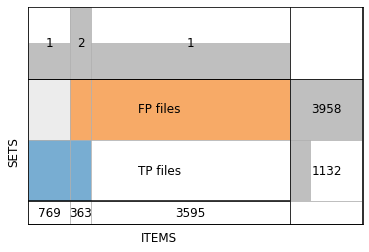

In [87]:
from supervenn import supervenn
labels = ['TP files', 'FP files']
supervenn([set(all_tp),set(all_fp)],labels);

In [ ]:
!pip install matplotlib-venn

In [60]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

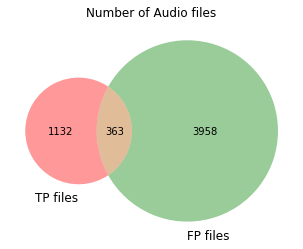

In [61]:
plt.figure(figsize=(6,4))
venn2(subsets = (1132, 3958, 363), set_labels = ('TP files', 'FP files'))

plt.title('Number of Audio files');

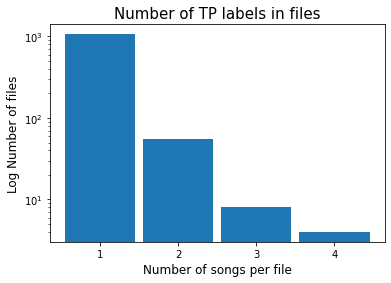

In [86]:
plt.title('Number of TP labels in files',fontsize=15);
plt.xlabel('Number of songs per file',fontsize=12);
plt.ylabel('Log Number of files',fontsize=12);
plt.hist(counts_tp,log=True,bins=4,align='left',rwidth=0.9);
plt.xticks([1,2,3,4]);

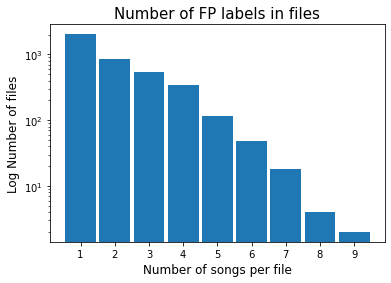

In [85]:
plt.title('Number of FP labels in files',fontsize=15);
plt.xlabel('Number of songs per file',fontsize=12);
plt.ylabel('Log Number of files',fontsize=12);
plt.hist(counts_fp,log=True,bins=9,align='left',rwidth=0.9);
plt.xticks(range(1,10));

In [90]:
sp_id_fp = data_fp['species_id'].values
sp_id_tp = data_tp['species_id'].values

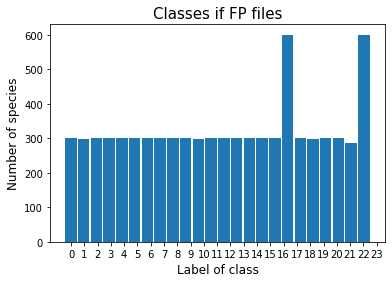

In [98]:
plt.title('Classes if FP files',fontsize=15);
plt.ylabel('Number of species',fontsize=12);
plt.xlabel('Label of class',fontsize=12);
plt.hist(sp_id_fp,bins=24,align='left',rwidth=0.9);
plt.xticks(range(0,24));

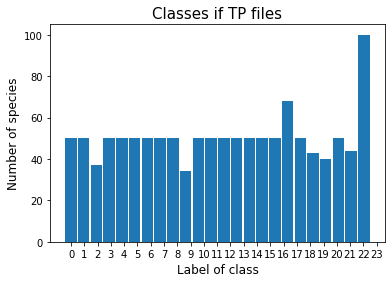

In [99]:
plt.title('Classes if TP files',fontsize=15);
plt.ylabel('Number of species',fontsize=12);
plt.xlabel('Label of class',fontsize=12);
plt.hist(sp_id_tp,bins=24,align='left',rwidth=0.9);
plt.xticks(range(0,24));